In [285]:
import numpy as np
import pandas as pd

In [286]:
train_data = pd.read_csv('train_data.csv', delimiter=';',parse_dates=['Date'])

In [287]:
train_data['Date']=pd.to_datetime(train_data['Date']).apply(lambda x: x.strftime('%Y-%m-%d'))

In [770]:
train_data = train_data[train_data['Price'] < 30000]
train_data = train_data[train_data['Price'] > 300]

In [771]:
train_data.head(30)

,Unnamed: 0,Id,Date,Price
27,27,307,2020-12-01,306
28,28,307,2021-01-01,320
30,30,307,2021-04-01,307
31,31,307,2021-05-01,311
32,32,307,2021-06-01,312
33,33,307,2021-07-01,320
34,34,307,2021-08-01,344
35,35,307,2021-09-01,395
36,36,307,2021-10-01,436
37,37,307,2021-11-01,389


In [772]:
count_filtered = train_data.groupby(['Id'])['Id'].count()
count_filtered.head(15)

Id
307    16
317    16
319    17
321    11
322     2
445     4
530    23
659    20
661    11
663    12
731     8
760    23
766    21
773    21
774    22
Name: Id, dtype: int64

In [773]:
import datetime, calendar

In [774]:
def get_datetime_rows_by_id(group):
  
  str_dates = group[['Date']].values.astype('datetime64[ns]')
#   dates = []
#   for str_date in str_dates:
#         dates.append(pd.to_datetime(*str_date))
  dates = pd.arrays.DatetimeArray(str_dates)
  
  return set(dates.to_pydatetime().flatten())

In [775]:
date_ranges = train_data.groupby(by=['Id']).apply(get_datetime_rows_by_id).rename('Date')

In [776]:
print(date_ranges.head(10))

Id
307    {2020-12-01 00:00:00, 2021-08-01 00:00:00, 202...
317    {2020-12-01 00:00:00, 2021-08-01 00:00:00, 202...
319    {2020-12-01 00:00:00, 2021-08-01 00:00:00, 202...
321    {2021-08-01 00:00:00, 2022-01-01 00:00:00, 202...
322           {2022-03-01 00:00:00, 2022-04-01 00:00:00}
445    {2022-03-01 00:00:00, 2022-02-01 00:00:00, 202...
530    {2020-12-01 00:00:00, 2021-05-01 00:00:00, 202...
659    {2021-05-01 00:00:00, 2021-06-01 00:00:00, 202...
661    {2022-03-01 00:00:00, 2021-05-01 00:00:00, 202...
663    {2021-08-01 00:00:00, 2022-03-01 00:00:00, 202...
Name: Date, dtype: object


In [777]:
pprint(date_ranges.loc[863])

Pretty printing has been turned ON


In [778]:
train_data_empty_months = pd.DataFrame(columns=['Id', 'Date', 'Price'])

In [779]:
def check_empty_months(date_ranges):
    res = {}
    idx = date_ranges.index
    for i in idx:
        temp = set(pd.date_range(min(date_ranges[i]), max(date_ranges[i]), freq="MS").to_pydatetime().flatten())
        res[i] = pd.Series(list(temp ^ date_ranges[i]))
    return res

In [780]:
emm = check_empty_months(date_ranges)

/tmp/ipykernel_320574/3111007545.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res[i] = pd.Series(list(temp ^ date_ranges[i]))


In [781]:
i = 0
for m in emm:
    for d in emm[m]:
        train_data_empty_months.loc[i] = [m, d, np.nan]
        i += 1

In [782]:
train_data_empty_months.head(10)

,Id,Date,Price
0,307,2021-03-01,NaN
1,307,2021-02-01,NaN
2,317,2021-03-01,NaN
3,317,2021-09-01,NaN
4,319,2020-08-01,NaN
5,319,2021-03-01,NaN
6,319,2020-11-01,NaN
7,319,2020-10-01,NaN
8,319,2020-07-01,NaN
9,319,2021-09-01,NaN


In [783]:
result = pd.concat([train_data, train_data_empty_months])

In [784]:
result = result.drop(result.columns[0], axis=1)

In [785]:
result['Date']=pd.to_datetime(result['Date']).apply(lambda x: x.strftime('%Y-%m-%d'))

In [786]:
result.sort_values(by=['Id', 'Date'], ascending=True, inplace=True)

In [787]:
result.head(20)

,Id,Date,Price
27,307,2020-12-01,306.0
28,307,2021-01-01,320.0
1,307,2021-02-01,NaN
0,307,2021-03-01,NaN
30,307,2021-04-01,307.0
31,307,2021-05-01,311.0
32,307,2021-06-01,312.0
33,307,2021-07-01,320.0
34,307,2021-08-01,344.0
35,307,2021-09-01,395.0


In [788]:
result = result.reset_index()

In [789]:
result.head(20)

,index,Id,Date,Price
0,27,307,2020-12-01,306.0
1,28,307,2021-01-01,320.0
2,1,307,2021-02-01,NaN
3,0,307,2021-03-01,NaN
4,30,307,2021-04-01,307.0
5,31,307,2021-05-01,311.0
6,32,307,2021-06-01,312.0
7,33,307,2021-07-01,320.0
8,34,307,2021-08-01,344.0
9,35,307,2021-09-01,395.0


In [790]:
result.fillna(method='ffill', inplace=True)

In [791]:
result = result.drop(result.columns[0], axis=1)
result.head(20)

,Id,Date,Price
0,307,2020-12-01,306.0
1,307,2021-01-01,320.0
2,307,2021-02-01,320.0
3,307,2021-03-01,320.0
4,307,2021-04-01,307.0
5,307,2021-05-01,311.0
6,307,2021-06-01,312.0
7,307,2021-07-01,320.0
8,307,2021-08-01,344.0
9,307,2021-09-01,395.0


In [792]:
result.columns

Index(['Id', 'Date', 'Price'], dtype='object')

In [793]:
from matplotlib import pyplot as plt

In [794]:
result['Price'].isnull().values.any()

False

In [795]:
def ipc(group):
    prices = group[['Price']] ** 1/2
    ipc = prices / prices.shift(1) * 100 - 100
    return ipc.values.flatten()

In [796]:
new_res = result.groupby(by=['Id']).apply(ipc).rename('IPC')

In [797]:
# new_res.to_csv('new_res.csv', sep=';', encoding='utf-8')

In [798]:
result.head(30)

,Id,Date,Price
0,307,2020-12-01,306.0
1,307,2021-01-01,320.0
2,307,2021-02-01,320.0
3,307,2021-03-01,320.0
4,307,2021-04-01,307.0
5,307,2021-05-01,311.0
6,307,2021-06-01,312.0
7,307,2021-07-01,320.0
8,307,2021-08-01,344.0
9,307,2021-09-01,395.0


In [799]:
from scipy import stats

In [800]:
for n in new_res.index:
    new_res[n][np.isnan(new_res[n])] = np.nan_to_num(new_res[n]).mean()
new_res.head()

Id
307    [3.213116358762278, 4.575163398692823, 0.0, 0....
317    [3.8557207418362287, 3.6303630363036348, -0.31...
319    [2.3792860858407128, 0.0, 0.0, 0.0, 0.0, 0.0, ...
321    [4.893621519859625, 0.6557377049180246, 2.9315...
322           [-1.2578616352201237, -2.5157232704402475]
Name: IPC, dtype: object

In [801]:
r = new_res.to_list()
flat_list = [item if abs(item) > 1 else 1 for sublist in r for item in sublist]

In [802]:
# print(flat_list)

In [803]:
result["IPC"] = flat_list

In [804]:
result.isnull().values.any()

False

In [805]:
result.head(50)

,Id,Date,Price,IPC
0,307,2020-12-01,306.0,3.213116
1,307,2021-01-01,320.0,4.575163
2,307,2021-02-01,320.0,1.000000
3,307,2021-03-01,320.0,1.000000
4,307,2021-04-01,307.0,-4.062500
5,307,2021-05-01,311.0,1.302932
6,307,2021-06-01,312.0,1.000000
7,307,2021-07-01,320.0,2.564103
8,307,2021-08-01,344.0,7.500000
9,307,2021-09-01,395.0,14.825581


In [806]:
result['IPC'].max()
result['IPC'].idxmax()
result.loc[5742]

Id            14162
Date     2020-08-01
Price        2051.0
IPC       96.267943
Name: 5742, dtype: object

In [807]:
uni_data = result.groupby(['Date'])['IPC'].mean()
# uni_data.index = result['Date']
uni_data.head(100)

Date
2020-06-01     1.643548
2020-07-01   -15.332382
2020-08-01     6.993673
2020-09-01    -0.147431
2020-10-01     0.240681
2020-11-01    -4.444424
2020-12-01     2.380590
2021-01-01     3.871615
2021-02-01    -1.403435
2021-03-01     1.122213
2021-04-01     1.778449
2021-05-01     1.052931
2021-06-01     0.817590
2021-07-01     1.845363
2021-08-01     2.129293
2021-09-01     2.414349
2021-10-01     3.962659
2021-11-01     3.256546
2021-12-01     1.706644
2022-01-01     3.178954
2022-02-01     1.097351
2022-03-01    20.240174
2022-04-01     0.892098
2022-05-01    -0.491776
Name: IPC, dtype: float64

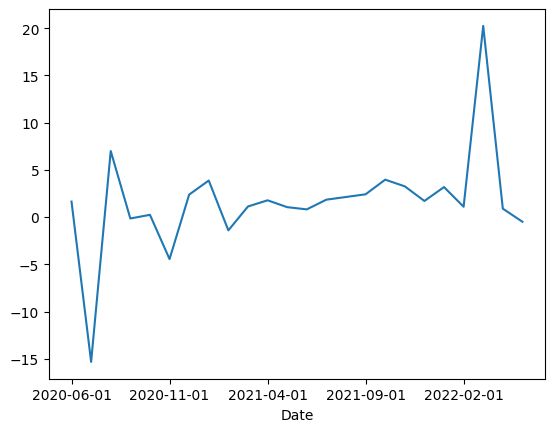

In [808]:
# plt.plot(uni_data)
uni_data.plot(subplots=True);

In [809]:
result.to_csv('IPC_data_train.csv', sep=';', encoding='utf-8')